<a href="https://colab.research.google.com/github/orimejia/Proyecto-AI/blob/main/01_Simulaci%C3%B3n_de_datos_ENTREGAFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 - Simulación de datos**


## En este colab se va a presentar la información del dataset, y se van realizar los ajustes pertinentes del mismo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
url = 'https://raw.githubusercontent.com/HernanAC/TaiwaneseBankruptcyPrediction/main/data.csv'
data = pd.read_csv(url)

## Cargando el dataset

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Tamaño del dataset

In [4]:
data.shape

(6819, 96)

## Información de las columnas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Descripción de los datos

In [6]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## Distrubución de los datos 


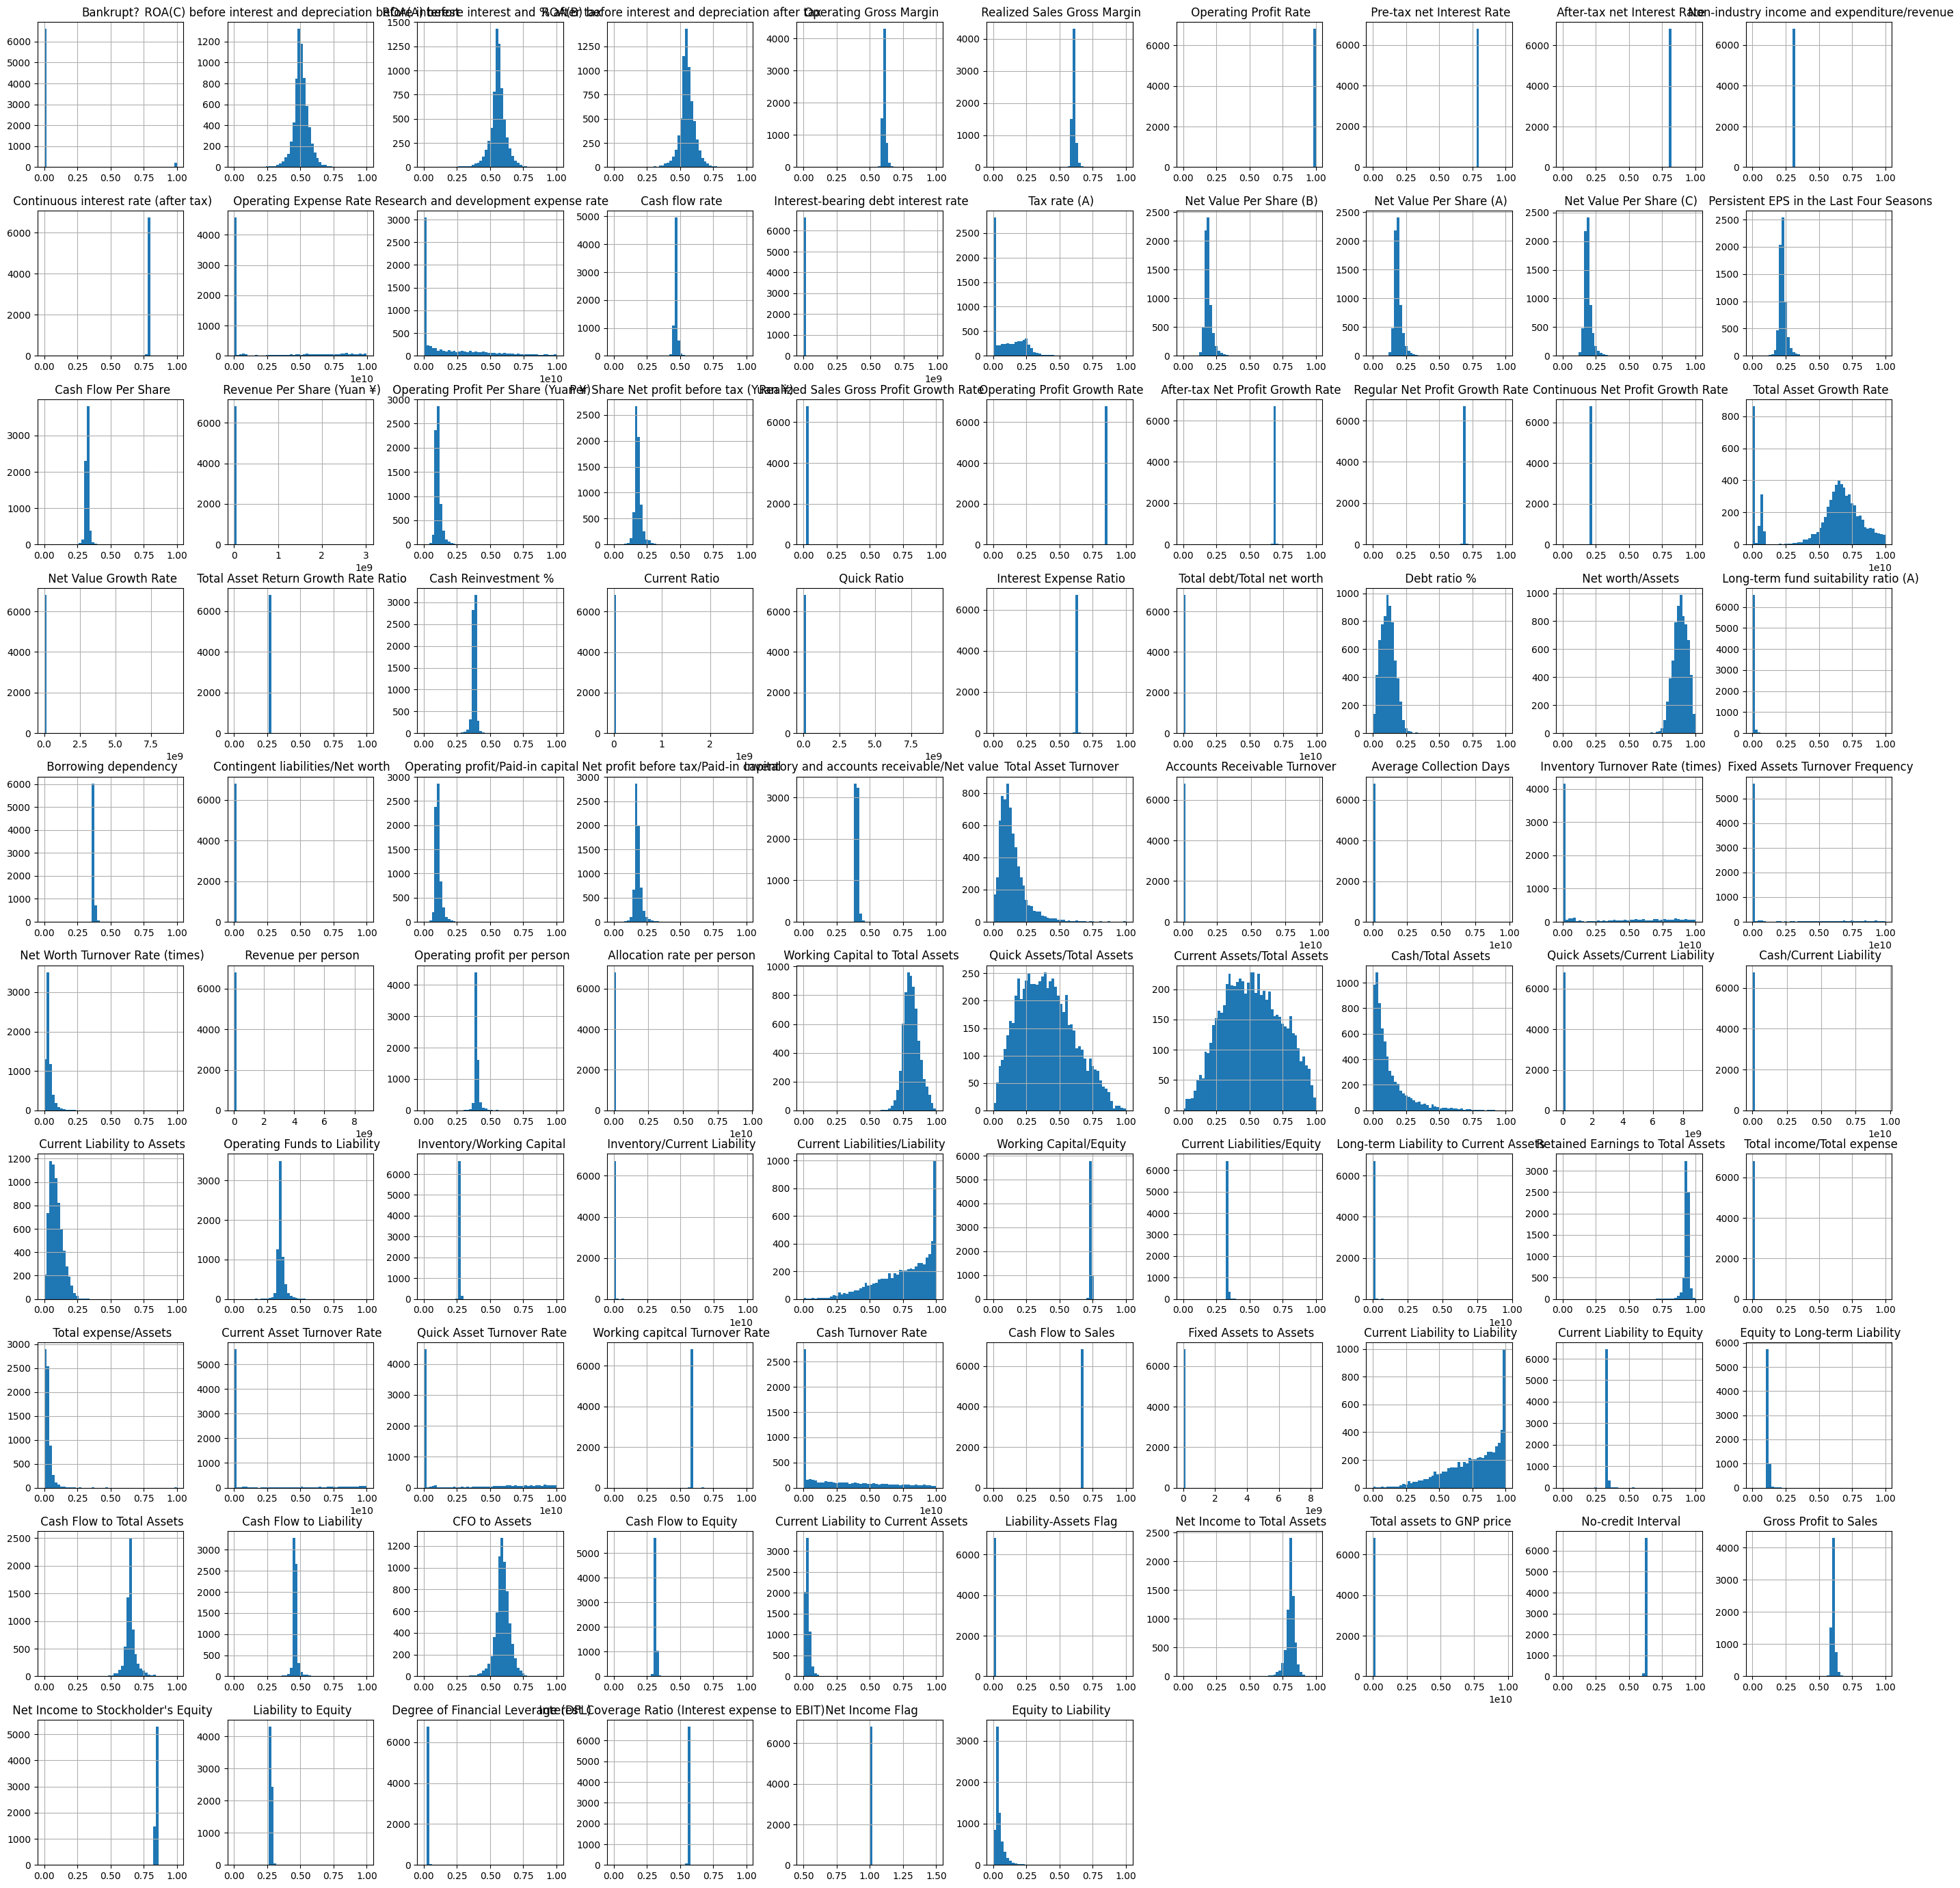

In [7]:
data.hist(figsize = (35,35), bins = 50)
plt.show()

# Total de columnas categóricas



In [8]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index
data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

## Total de valores nulos

In [9]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [10]:
data.duplicated().sum()

0

## Añadiendo más columnas categóricas

In [11]:
def modify_column(data, column_name):
    if column_name not in data.columns:
        print(f"{column_name} is not a valid column name.")
        return data
    else:
        col_idx = data.columns.get_loc(column_name)
        for i in range(len(data)):
            if data.iloc[i, col_idx] < 0.33:
                data.iloc[i, col_idx] = "LOW"
            elif data.iloc[i, col_idx] < 0.66:
                data.iloc[i, col_idx] = "MEDIUM"
            else:
                data.iloc[i, col_idx] = "HIGH"
        return data

In [12]:
columns_to_modify = [' ROA(C) before interest and depreciation before interest', 
                     ' ROA(B) before interest and depreciation after tax',
                     ' ROA(A) before interest and % after tax', 
                     ' Non-industry income and expenditure/revenue', 
                     ' Inventory Turnover Rate (times)', 
                     ' Working Capital/Equity', 
                     ' Cash Flow to Sales',
                     ' Net Income to Total Assets'
                     ]
columns_to_modify

[' ROA(C) before interest and depreciation before interest',
 ' ROA(B) before interest and depreciation after tax',
 ' ROA(A) before interest and % after tax',
 ' Non-industry income and expenditure/revenue',
 ' Inventory Turnover Rate (times)',
 ' Working Capital/Equity',
 ' Cash Flow to Sales',
 ' Net Income to Total Assets']

In [13]:
for column_name in columns_to_modify:
  modify_column(data, column_name)
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,MEDIUM,MEDIUM,MEDIUM,0.601457,0.601457,0.998969,0.796887,0.808809,LOW,...,HIGH,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,MEDIUM,MEDIUM,MEDIUM,0.610235,0.610235,0.998946,0.797380,0.809301,LOW,...,HIGH,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,MEDIUM,MEDIUM,MEDIUM,0.601450,0.601364,0.998857,0.796403,0.808388,LOW,...,HIGH,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,MEDIUM,MEDIUM,MEDIUM,0.583541,0.583541,0.998700,0.796967,0.808966,LOW,...,HIGH,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,MEDIUM,MEDIUM,MEDIUM,0.598783,0.598783,0.998973,0.797366,0.809304,LOW,...,HIGH,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,MEDIUM,MEDIUM,MEDIUM,0.604455,0.604462,0.998992,0.797409,0.809331,LOW,...,HIGH,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,MEDIUM,MEDIUM,MEDIUM,0.598308,0.598308,0.998992,0.797414,0.809327,LOW,...,HIGH,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,MEDIUM,MEDIUM,MEDIUM,0.610444,0.610213,0.998984,0.797401,0.809317,LOW,...,HIGH,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,MEDIUM,MEDIUM,MEDIUM,0.607850,0.607850,0.999074,0.797500,0.809399,LOW,...,HIGH,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [14]:

numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index
categorical_features2 = data.dtypes[data.dtypes == 'object'].index
data[categorical_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

In [15]:
categorical_features2 = data.dtypes[data.dtypes == 'object'].index
data[categorical_features2].columns.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Non-industry income and expenditure/revenue',
 ' Inventory Turnover Rate (times)',
 ' Working Capital/Equity',
 ' Cash Flow to Sales',
 ' Net Income to Total Assets']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   object 
 2    ROA(A) before interest and % after tax                   6819 non-null   object 
 3    ROA(B) before interest and depreciation after tax        6819 non-null   object 
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

## Añaniendo valores nulos

In [17]:
for i in range(0, len(data), 5) :
    data.at[i, ' Operating Gross Margin'] = np.nan
    data.at[i, ' Cash Turnover Rate'] = np.nan
    data.at[i, ' Current Liability to Equity'] = np.nan

In [18]:
data.isnull().sum()

Bankrupt?                                                      0
 ROA(C) before interest and depreciation before interest       0
 ROA(A) before interest and % after tax                        0
 ROA(B) before interest and depreciation after tax             0
 Operating Gross Margin                                     1364
                                                            ... 
 Liability to Equity                                           0
 Degree of Financial Leverage (DFL)                            0
 Interest Coverage Ratio (Interest expense to EBIT)            0
 Net Income Flag                                               0
 Equity to Liability                                           0
Length: 96, dtype: int64

In [19]:
nulos = data.isna().sum() 
nulos[nulos != 0]

 Operating Gross Margin         1364
 Cash Turnover Rate             1364
 Current Liability to Equity    1364
dtype: int64

Se intertan valores nulos, y se agregan las columnas categóricas.

In [20]:
data.to_csv('simulated_data.csv', index=False)